In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
df = pd.read_csv('/Users/tiggy/Documents/cli/CS 5010/Project/va_final3.csv',low_memory=False)

In [3]:
assert len(df['id'])==590687,"Error reading in all records"

Define date-time aggregates in terms of start time for trip

In [4]:
df['x']=pd.to_datetime(df['started_at'])
df['month']=df['x'].dt.month
df['year']=df['x'].dt.year
df['smy'] = df['x'].dt.strftime('%Y%m')  #start month and year
df['month']=df['x'].dt.month
df['year']=df['x'].dt.year
df['day']=df['x'].dt.day
df['smyd'] = df['x'].dt.strftime('%D')  #start month, year and day
df['dow']=df['x'].dt.dayofweek  #day of week
df['hour']=df['x'].dt.hour  #hour of day
df['smydh']=df['smyd'].astype(str)+'_'+df['hour'].astype(str)  #start month, year, day, hour

Assert statements to test if date-time aggregates have correct counts

In [7]:
assert (len(pd.unique(df['day']))>=28 and len(pd.unique(df['day']))<=31),"Error in day count"
assert (len(pd.unique(df['dow']))==7),"Error in day of week count"
assert (len(pd.unique(df['hour']))==24) ,"Error in hour count"
assert (len(pd.unique(df['month']))==12),  "Error in month count"
assert (len(pd.unique(df['year']))==3),  "Error in month count"

Monthly datasets will reduce data processing and help us focus on the key months

In [20]:
dfjune=df[(df['month'] == 6)]
dffeb=df[(df['month'] == 2)]
dfmarch=df[(df['month'] == 3)]
dfmay=df[(df['month'] == 5)]
dfaug=df[(df['month'] == 8)]
dfsep=df[(df['month'] == 9)]
dfoct=df[(df['month'] == 10)]
dfdec=df[(df['month'] == 12)]

Assert statements to assure daily COVID data are mapped to month/day/year only

In [21]:
assert len(pd.unique(dfjune['Deaths']))<=31, "Error merging daily COVID death data"
assert len(pd.unique(dfaug['Hospitalizations']))<=32, "Error merging daily COVID hospitalization data"

Number of trips groupby vars

In [22]:
df['trips_y']=df.groupby('year').id.transform('count')
df['trips_my'] = df.groupby('smy').id.transform('count')
df['trips_m'] = df.groupby('month').id.transform('count')
df['trips_daily'] = df.groupby('smyd').id.transform('count')
df['trips_hourly'] = df.groupby('smydh').id.transform('count')
# citation: https://cmdlinetips.com/2019/10/how-to-add-group-level-summary-statistic-as-a-new-column-in-pandas/

Test if bar plots are plotting the correct aggregates

Text(0, 0.5, 'Trips')

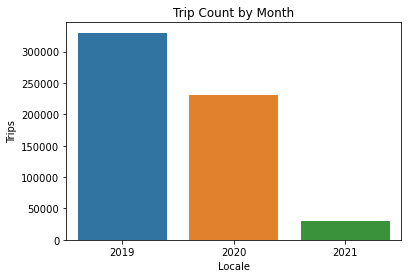

In [23]:
#validate that we are plotting the right number of observations
ax = sns.barplot(x="year", y="trips_y", data=df)
ax.set_title('Trip Count by Month')
ax.set_xlabel('Locale')
ax.set_ylabel('Trips')

In [24]:
df.year.value_counts()  #The number of trips per year match the chart!

2019    330144
2020    230536
2021     30007
Name: year, dtype: int64

Visualization: Time series of trends in COVID in VA and year to year bikesharing

Text(0.5, 1.0, 'Cum. Deaths and Hospitalizations in VA')

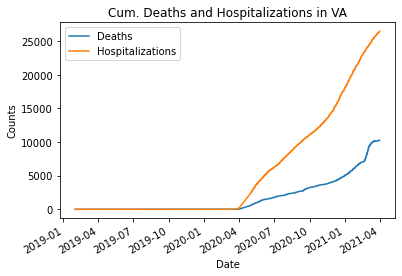

In [25]:
ts=df.set_index('x')
lines = ts['Deaths'].plot.line()
lines = ts['Hospitalizations'].plot.line()
plt.legend()
plt.xlabel("Date")
plt.ylabel("Counts")
plt.title("Cum. Deaths and Hospitalizations in VA")

Text(0, 0.5, 'Trips')

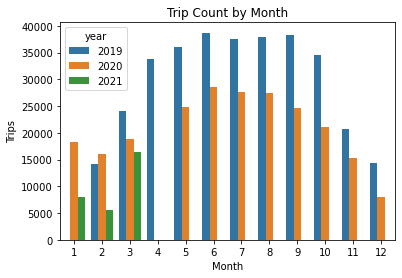

In [34]:
ax = sns.barplot(x="month", y="trips_my", hue='year',data=df)
ax.set_title('Trip Count by Month')
ax.set_xlabel('Month')
ax.set_ylabel('Trips')

Quarterly time of day and day of week charts suggest more leisure cycling along wit reduced commuter cycling.

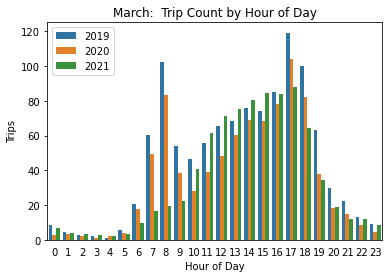

In [33]:
ax1=sns.barplot(x="hour", y="trips_hourly",hue='year',data=dfmarch, ci=None)
ax1.set_title('March:  Trip Count by Hour of Day')
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Trips')
ax1.legend(loc='upper left')
#Adjust to include only COVID months in 2020 ; exclude Jan; redo 
ax1.tick_params(left = True, right = False , labelleft = True ,
                labelbottom = True, bottom = False)

Time of day analysis

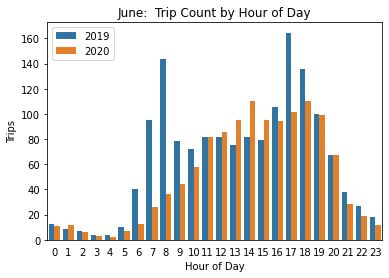

In [27]:
ax2=sns.barplot(x="hour", y="trips_hourly",hue='year',data=dfjune, ci=None)
ax2.set_title('June:  Trip Count by Hour of Day')
ax2.set_xlabel('Hour of Day')
ax2.set_ylabel('Trips')
ax2.legend(loc='upper left')
ax2.tick_params(left = True, right = False , labelleft = True ,
                labelbottom = True, bottom = False)

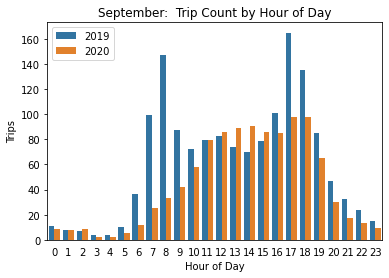

In [28]:
ax3=sns.barplot(x="hour", y="trips_hourly",hue='year',data=dfsep, ci=None)
ax3.set_title('September:  Trip Count by Hour of Day')
ax3.set_xlabel('Hour of Day')
ax3.set_ylabel('Trips')
ax3.legend(loc='upper left')
ax3.tick_params(left = True, right = False , labelleft = True ,
                labelbottom = True, bottom = False)

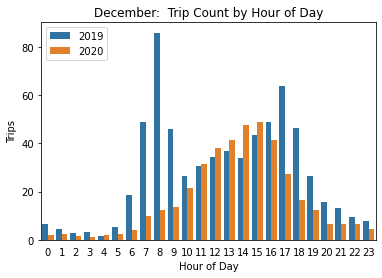

In [29]:
ax4=sns.barplot(x="hour", y="trips_hourly",hue='year',data=dfdec, ci=None)
ax4.set_title('December:  Trip Count by Hour of Day')
ax4.set_xlabel('Hour of Day')
ax4.set_ylabel('Trips')
ax4.legend(loc='upper left')
ax4.tick_params(left = True, right = False , labelleft = True ,
                labelbottom = True, bottom = False)

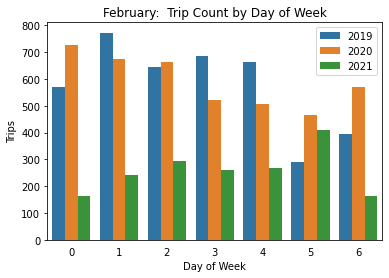

In [30]:
ax0=sns.barplot(x="dow", y="trips_daily", hue='year',data=dffeb , ci=None)
ax0.set_title('February:  Trip Count by Day of Week')
ax0.set_xlabel('Day of Week')
ax0.set_ylabel('Trips')
ax0.legend(loc='upper right')
#Adjust to include only COVID months in 2020 ; exclude Jan; redo 
ax0.tick_params(left = True, right = False , labelleft = True ,
                labelbottom = True, bottom = False)

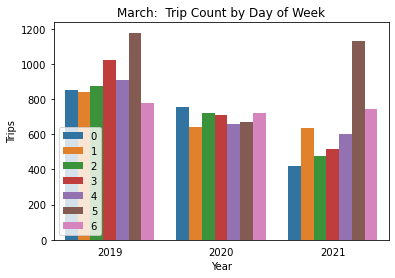

In [31]:
ax1=sns.barplot(x="year", y="trips_daily", hue='dow',data=dfmarch, ci=None)
ax1.set_title('March:  Trip Count by Day of Week')
ax1.set_xlabel('Year')
ax1.set_ylabel('Trips')
ax1.legend(loc='lower left')
#Adjust to include only COVID months in 2020 ; exclude Jan; redo 
ax1.tick_params(left = True, right = False , labelleft = True ,
                labelbottom = True, bottom = False)

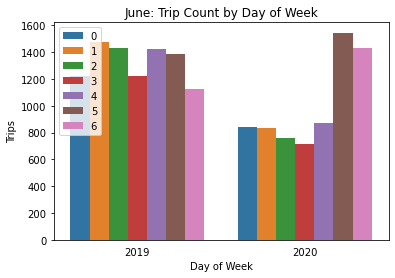

In [25]:
ax2=sns.barplot(x="year", y="trips_daily", hue='dow',data=dfjune,ci=None)
ax2.set_title('June: Trip Count by Day of Week')
ax2.set_xlabel('Day of Week')
ax2.set_ylabel('Trips')
ax2.legend(loc='upper left')
#Adjust to include only COVID months in 2020 ; exclude Jan; redo 
ax2.tick_params(left = True, right = False , labelleft = True ,
                labelbottom = True, bottom = False)